# Summary

In [1]:
library("tidyverse")
library("tidymodels")

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”Warning message:
“package ‘tidyr’ was built under R version 3.6.2”Warning message:
“package ‘dplyr’ was built under R version 3.6.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘tidymodels’ was built under R version 3.6.2”── Attaching packages ────────────────────────────────────── tidymodels 0.1.0 ──
✔ broom     0.5.5          ✔ rsample   0.0.5     
✔ dials     0.0.4          ✔ tune      0.0.1.9000
✔ infer     0.5.1          ✔ workflows 0.1.1     
✔ parsnip   0.0.5   

In [16]:
pred_df = bind_rows(
    read_rds("pred_df_boost_tree.rds") %>% mutate(model="boost_tree"),
    read_rds("pred_df_decision_tree.rds") %>% mutate(model="decision_tree"),
    read_rds("pred_df_logit.rds") %>% mutate(model="logitstic_reg"),
    read_rds("pred_df_random_forest.rds") %>% mutate(model="random_forest"),
) %>% group_by(model) %>% nest()
pred_df %>% str(2)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	4 obs. of  2 variables:
 $ model: chr  "boost_tree" "decision_tree" "logitstic_reg" "random_forest"
 $ data :List of 4
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	169817 obs. of  118 variables:
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	169967 obs. of  118 variables:
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170194 obs. of  118 variables:
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	169855 obs. of  118 variables:
 - attr(*, "groups")=Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4 obs. of  2 variables:
  ..$ model: chr  "boost_tree" "decision_tree" "logitstic_reg" "random_forest"
  ..$ .rows:List of 4
  ..- attr(*, ".drop")= logi FALSE


In [21]:
assess_df = bind_rows(
    read_rds("assess_df_boost_tree.rds") %>% mutate(model="boost_tree"),
    read_rds("assess_df_decision_tree.rds") %>% mutate(model="decision_tree"),
    read_rds("assess_df_logit.rds") %>% mutate(model="logitstic_reg"),
    read_rds("assess_df_random_forest.rds") %>% mutate(model="random_forest"),
) %>% group_by(model) %>% nest()
assess_df %>% str(2)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	4 obs. of  2 variables:
 $ model: chr  "boost_tree" "decision_tree" "logitstic_reg" "random_forest"
 $ data :List of 4
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	3 obs. of  3 variables:
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	3 obs. of  3 variables:
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	3 obs. of  3 variables:
  ..$ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	3 obs. of  3 variables:
 - attr(*, "groups")=Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4 obs. of  2 variables:
  ..$ model: chr  "boost_tree" "decision_tree" "logitstic_reg" "random_forest"
  ..$ .rows:List of 4
  ..- attr(*, ".drop")= logi FALSE


## Metrics

In [6]:
metrics_df = pred_df %>%
    mutate(metrics=data %>% map(function(df) {
        df %>%
            metrics(truth=live_birth_occurr, estimate=.pred_class) %>%
            bind_rows(
                df %>%
                    mutate_at(vars(.pred_class), function(x) as.integer(as.character(x))) %>%
                    roc_auc(., live_birth_occurr, .pred_class)
            )
    }))

In [7]:
metrics_df %>% select(model, metrics) %>% unnest()

Warning message:
“`cols` is now required.
Please use `cols = c(metrics)`”

model,.metric,.estimator,.estimate
boost_tree,accuracy,binary,0.5905651
boost_tree,kap,binary,0.2309591
boost_tree,roc_auc,binary,0.6687149
decision_tree,accuracy,binary,0.5855960
decision_tree,kap,binary,0.2217399
decision_tree,roc_auc,binary,0.6616971
logitstic_reg,accuracy,binary,0.5911783
logitstic_reg,kap,binary,0.2191906
logitstic_reg,roc_auc,binary,0.6576789
random_forest,accuracy,binary,0.5865415


In [22]:
assess_df %>% select(model, data) %>% unnest()

Warning message:
“`cols` is now required.
Please use `cols = c(data)`”

model,.metric,.estimator,.estimate
boost_tree,accuracy,binary,0.6797424
boost_tree,kap,binary,0.3535501
boost_tree,roc_auc,binary,0.6753093
decision_tree,accuracy,binary,0.6744483
decision_tree,kap,binary,0.3428825
decision_tree,roc_auc,binary,0.6700263
logitstic_reg,accuracy,binary,0.6623691
logitstic_reg,kap,binary,0.3193420
logitstic_reg,roc_auc,binary,0.6585507
random_forest,accuracy,binary,0.7790087


## ROC curve

In [8]:
roc_df = pred_df %>%
    mutate(roc=data %>% map(function(df) {
        df %>%
        mutate_at(vars(.pred_class), function(x) as.integer(as.character(x))) %>%
        roc_curve(., live_birth_occurr, .pred_class)
    }))

Warning message:
“`cols` is now required.
Please use `cols = c(roc)`”

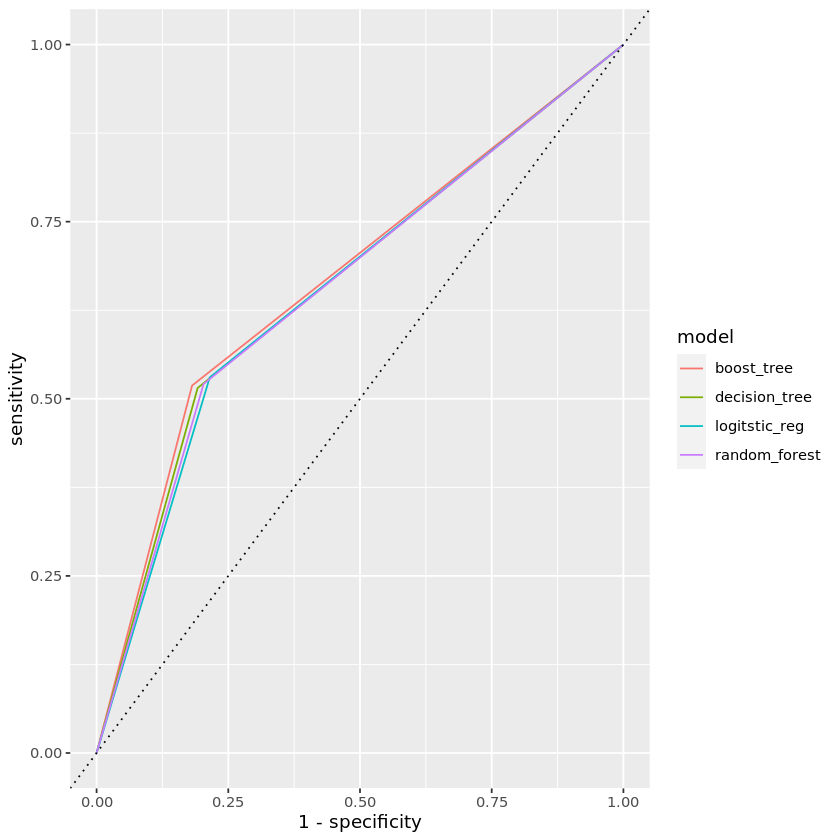

In [15]:
roc_df %>% select(roc, model) %>% unnest() %>%
{
    ggplot(.) +
    aes(x = 1 - specificity, y = sensitivity, 
        group=model, color=model) +
    geom_path() +
    geom_abline(lty = 3)
}